In [1]:
import numpy as np
import pyqentangle #For Schmidt decomposition
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator

In [2]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

/home/tlo/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
#Prepare Arbitrary state psi = a_00|00> + a_01|01> + a_10|10> + a_11|11>
#Use Schmidt decomposition to find out the Schmidt basis
def Schmidt_Decomp(a_00=0.5, a_01=0.5, a_10=0.5, a_11=0.5):
    tensor = np.array([[a_00,a_01],[a_10,a_11]])
    return pyqentangle.schmidt_decomposition(tensor)

In [5]:
#Part a)
#Schmidt_Decomp(np.sqrt(0.5),0,0,np.sqrt(0.5))
#Schmidt_Decomp(np.sqrt(0.5),0,0,-np.sqrt(0.5))
A=np.array([[np.sqrt(0.5),0],[0,np.sqrt(0.5)]])
U,B,V = np.linalg.svd(A)
[U,B,V]
OU = Operator(U)
OV = Operator(V)
OB = Operator(np.diag(B))
OB

Operator([[0.70710678+0.j, 0.        +0.j],
          [0.        +0.j, 0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))

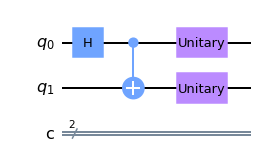

In [6]:
#Create registers
qr=qk.QuantumRegister(2,'q')
cr=qk.ClassicalRegister(2,'c')
qc=qk.QuantumCircuit(qr,cr)

#Operate
qc.h(0)
qc.cx(0,1)
qc.unitary(OV, 1)
qc.unitary(OU, 0)
qc.draw('mpl')

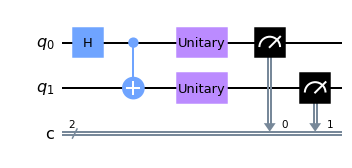

In [7]:
#Measure
measureZ = qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ = qc + measureZ

testZ.draw('mpl')

In [8]:
#send to IBM
backend = my_provider.get_backend('ibmq_qasm_simulator')
jobIBM = qk.execute([testZ],backend=backend,shots=1024)
res = jobIBM.result()

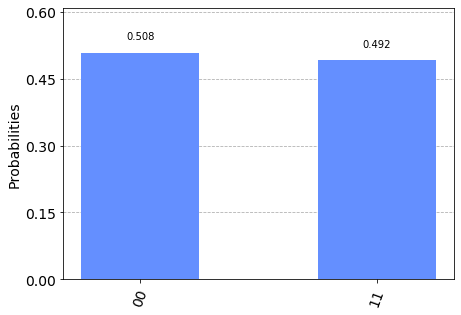

In [9]:
plot_histogram(res.get_counts(testZ))

In [10]:
#Part b)

A=np.array([[0,np.sqrt(0.5)],[np.sqrt(0.5),0]])
U,B,V = np.linalg.svd(A)
[U,B,V]
OU = Operator(U)
OV = Operator(V)
OB = Operator(np.diag(B))
OB

Operator([[0.70710678+0.j, 0.        +0.j],
          [0.        +0.j, 0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))

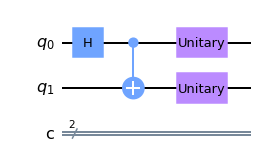

In [11]:
#Create registers
qr=qk.QuantumRegister(2,'q')
cr=qk.ClassicalRegister(2,'c')
qc=qk.QuantumCircuit(qr,cr)

#Operate
qc.h(0)
qc.cx(0,1)
qc.unitary(OV, 1)
qc.unitary(OU, 0)
qc.draw('mpl')

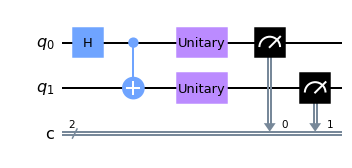

In [12]:
#Measure
measureZ = qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ = qc + measureZ

testZ.draw('mpl')

In [13]:
#send to IBM
backend = my_provider.get_backend('ibmq_qasm_simulator')
jobIBM = qk.execute([testZ],backend=backend,shots=1024)
res = jobIBM.result()

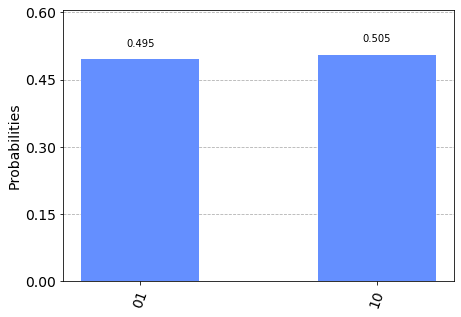

In [14]:
plot_histogram(res.get_counts(testZ))

In [136]:
#Part c)

A=np.array([[3/np.sqrt(12),1/np.sqrt(12)],[1/np.sqrt(12),-1/np.sqrt(12)]])
U,B,V = np.linalg.svd(A)
#SD=Schmidt_Decomp(3/np.sqrt(12),1/np.sqrt(12),1/np.sqrt(12),-1/np.sqrt(12))
[U,B,V]
OU = Operator(U)
OV = Operator(V)
OB = Operator(np.diag(B))
OU

Operator([[-0.97324899+0.j, -0.22975292+0.j],
          [-0.22975292+0.j,  0.97324899+0.j]],
         input_dims=(2,), output_dims=(2,))

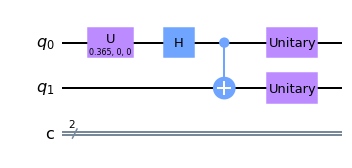

In [130]:
#Create registers
qr=qk.QuantumRegister(2,'q')
cr=qk.ClassicalRegister(2,'c')
qc=qk.QuantumCircuit(qr,cr)

#Operate
#qc.h(0)
#qc.h(1)

qc.u(np.arccos(B[0]),0,0,0)
qc.h(0)
qc.cx(0,1)
#qc.z(0)
#qc.u(np.cos(B[0]),0,0,0)
#qc.rz(np.cos(B[1]),1)
#qc.cx(0,1)
#qc.rz(np.cos(B[0]),1)
#qc.cx(1,0)
qc.unitary(OV, 0)
qc.unitary(OU, 1)
qc.draw('mpl')

#I don't understand why this dous not work...
#I didn't want to just copy the correct sequence of gates from the solutions you sent.

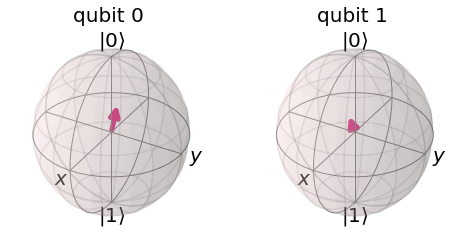

In [131]:
#See how the initial state looks like
backend = Aer.get_backend('statevector_simulator')
out = qk.execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

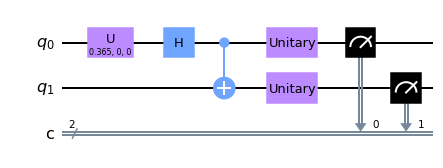

In [132]:
#Measure
measureZ = qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ = qc + measureZ

testZ.draw('mpl')

In [133]:
#send to IBM
backend = my_provider.get_backend('ibmq_qasm_simulator')
jobIBM = qk.execute([testZ],backend=backend,shots=1024)
res = jobIBM.result()

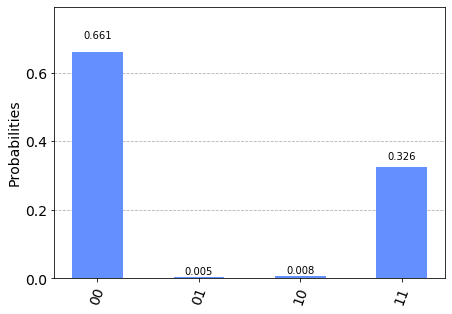

In [134]:
plot_histogram(res.get_counts(testZ))